# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0381 Просекин Тимур. Вариант №15

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения

<b>Подгруппа</b> - подмножествоо узлов $N_s$<br>

<b>Клика</b> - максимальный полный подграф из трех или более узлов.

<b>n-клика</b> - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n: $d(i, j)<=n; n_i, n_j $ принадлежат $N_s$

<b>n-кланы</b> - n-клика, в которой d(i, j) между всеми узлами в подграфе не превышает n для всех путей внутри графа.

<b>n-коубы</b> - максимально полный полграф диаметра <= n

<b>k-ядро</b> - максимальный подграф, в котором каждая вершина связана минимум с k другими вершинами этого же подграфа.

<b>k-плекс</b> - это максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не мене чем с $g_s - k$ узлами подграфа.

<b>Модулярность</b> - характеристика структуры сети, в частности степени кластеризации узлов, когда внутри кластера наблюдается много узлов (высокая плотность), а между кластерами мало узлов (низкая плотность)

<b>Сеть аффилированности</b> - сеть, в которой участники аффилированны друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определнном событии. Сеть состоит из двух измерений: множества акторов $N = {n_1,...,n_g}$ и множества событий $M = {m_1, ... , m_h}$

<b>Матрица инцидентности</b> - $A = {a_{ij}}$ размерности gxh с элементами $a_{ij} \begin{cases} {1, d(i,j)!=0} \\{0} \end{cases}$

<b>Двудольный граф</b> - это граф, узлы которого можно разделить на два подмножества, а все ребра соединяют узлы, принадлежащие разным подмножествам.

<b>Матрица соучастия акторов</b>: $X^N = {x_{ij}^N}$: $x_{ij}^N = \sum_{k = 1}^h{a_{ik}a_{jk}} = XX^T$

<b>Матрица перекрытия событий</b>: $X^M = {x_{ij}^M}$: $x_{kl}^M = \sum_{l = 1}^g{a_{il}a_{jl}} = X^TX$

<b>Степень участия</b> - это количество событий, с которыми связан каждый актор: $a_{i+} = X_{ii}^N$

<b>Средняя степень участия</b> - количество событий, с которыми актор аффилирован: $\bar{a_{i+}} = \frac{1}{g}\sum_{i = 1}^gx_{ii}^N$

<b>Размер события</b>: $a_{+j} = x_{jj}^M$

<b>Средний размер событий</b> - количество акторов в каждом событии: $\bar{a_{+j}} = \frac{1}{h}\sum_{j = 1}^h{x_{jj}^M}$

<b>Плотность для отношения соучастия</b>: $\delta_{N} = \frac{1}{g(g-1)}\sum_{i = 1}^{g}\sum_{j = 1}^{g}x_{ij}^N$

<b>Плотность для отношения перекрытия</b>: $\delta_{M} = \frac{1}{h(h-1)}\sum_{k = 1}^{h}\sum_{l = 1}^{h}x_{kl}^M$

<b>Диаметр сети аффилированности</b> - это длина самого длинного пути между любой парой акторов и/или событий

<b>Клика уровня с для отношения соучастия</b> - подграф, в котором все пары акторов участвую не менее чем в с событиях

<b>Клика уровня с для отношения перекрытия</b> - подграф, в котором все пары событий имеют не менее с общих членов

<b>$x_{kl}^M$</b> - число акторов, которые аффилированы с событиями k и l

<b>$x_{\bar{kl}}^M$</b> - число акторов, которые не принадлежат ни одному событию

<b>$x_{k\bar{l}}^M$</b> - число акторов, которы аффилированы с событием k но не с l

<b>$x_{\bar{k}l}^M$</b> - число акторов, аффилированных с l, но не с k

Мерой критерия между событиями, которая не зависит от размера событий, называетют <b>отношение шансов</b>: $\theta_{kl} = \frac{\frac{x_{kl}^M}{x_{\bar{k}l}^M}}{\frac{x_{k\bar{l}}^M}{x_{\bar{kl}}}} = \frac{\frac{x_{kl}^M}{x_{\bar{kl}}^M}}{\frac{x_{\bar{k}l}^M}{x_{k\bar{l}}^M}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы
Язык программирования - R

In [21]:
install.packages("igraph")
install.packages("BiocManager")
install.packages("network")
BiocManager::install("RBGL")
install.packages("statnet")
install.packages("HyperG")
library(RBGL)
library(graph)
library(igraph)
library(network)
library(HyperG)
library(statnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'RBGL'”
Old packages: 'bit', 'broom', 'bslib', 'data.table', 'devtools', 'digest',
  'evaluate', 'gert', 'htmltools', 'jsonlite', 'knitr', 'openssl', 'pkgload',
  'rmarkdown', 'roxygen2', 'sass', 'stringr', 'testthat', 'tidyverse',
  'tinytex', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign', 'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unsp

1. Из файла florentine_business.csv извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


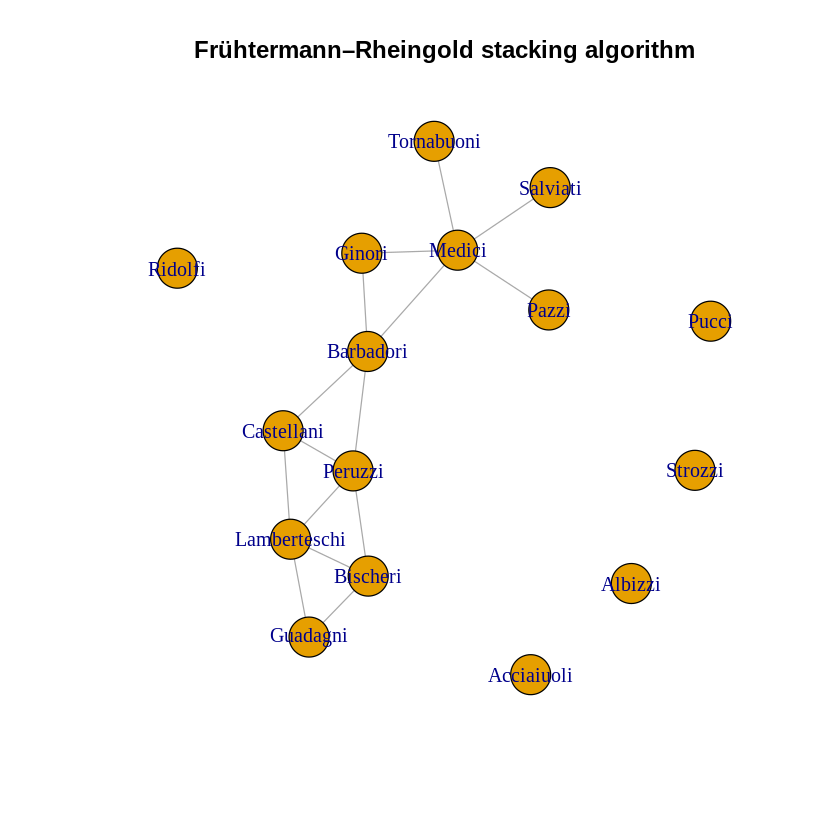

In [3]:
table <- read.csv('/content/florentine_business.csv', comment.char='#')
rownames(table) <- colnames(table)
sociomatrix <- as.matrix(table)
sociomatrix

graph <- graph.adjacency(sociomatrix, mode="undirected")
plot(graph, layout=layout_with_fr(graph), main="Frühtermann–Rheingold stacking algorithm")

     


2. Исследовать данную сеть на предмет подгрупп с помощью:

𝑛-клик, 𝑛-кланов, 𝑘-ядер, 𝑘-плексов

In [9]:
# n-клики
n_cliques <- kCliques(igraph.to.graphNEL(as.undirected(graph)))
n_cliques


#n-кланы
n_clan <- function(g,n){
  n_cliques <- kCliques(ugraph(igraph.to.graphNEL(g)))
  n.cand <- n_cliques[[n]]
  n.clan <- list()
  n.clan.i <- 1
  for (n.cand.i in 1:length(n.cand)) {
    g.n.cand <- induced_subgraph(g,n.cand[[n.cand.i]])
    if (diameter(g.n.cand)<=n){
      n.clan[[n.clan.i]] <- n.cand[[n.cand.i]]
      n.clan.i <- n.clan.i+1
    }
  }
  return(n.clan)
}

for (i in 1:5){
  print(i)
  print(n_clan(graph, i))
}

#k-ядра
info <- coreness(graph, mode="all")
result <-lapply(1:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
names(result) <- sapply(1:length(result), function(x) paste(x,"kernel",sep= "-"))
result


#k-плексы
k_plexes <- function(graph) {
    result <- c()
    for (i in 2:(length(V(graph)))) {
        for (j in 1:(i-1)) {
            plex <- k_plex(graph, j, i)
            if(length(plex) > 0) {
                result[[paste(toString(i), toString(j), "plex", sep="_")]] <- plex
            }
        }
    }
    return(result)
}

k_plex <- function(graph,k,m){
    graph.sym <- as.undirected(graph)
    k.plex <- list()
    graph.sym.degmk <- induced_subgraph(graph.sym,igraph::degree(graph.sym)>=(m-k))
    if(length(V(graph.sym.degmk)) < m) {
        return(k.plex)
    } 
    k.cand <- combn(V(graph.sym.degmk)$name,m)
    k.plex <- list() 
    k.plex.i <- 1 
    for (k.cand.i in 1:dim(k.cand)[2]){ 
        graph.k.cand <- induced_subgraph(graph.sym.degmk,k.cand[,k.cand.i]) 
        if (min(igraph::degree(graph.k.cand))>=(m-k)){
            k.plex[[k.plex.i]] <- k.cand[,k.cand.i] 
            k.plex.i <- k.plex.i+1 
        }
    }
    return(k.plex)
}

k_plexes(graph)
     




$`1-cliques`
$`1-cliques`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`1-cliques`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`1-cliques`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`1-cliques`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`1-cliques`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`1-cliques`[[6]]
[1] "Medici" "Pazzi" 

$`1-cliques`[[7]]
[1] "Medici"   "Salviati"

$`1-cliques`[[8]]
[1] "Medici"     "Tornabuoni"


$`2-cliques`
$`2-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`2-cliques`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Peruzzi"   

$`2-cliques`[[3]]
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`2-cliques`[[4]]
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"


$`3-cliques`
$`3-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
[6] "Medici"       "Peruzzi"     

$`3-cliques`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi"
[6] "Peruzzi"     

$`3-cliques`[[3]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Pazzi"     
[6] "Peruzzi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Medici"       "Peruzzi"     

$`4-cliques`[[2]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
 [6] "Medici"       "Pazzi"        "Peruzzi"      "Salviati"     "Tornabuoni"  


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
 [6] "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[11] "Tornabuoni"

[1] 1
[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

[[6]]
[1] "Medici" "Pazzi" 

[[7]]
[1] "Medici"   "Salviati"

[[8]]
[1] "Medici"     "Tornabuoni"

[1] 2
[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

[[2]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Peruzzi"   

[[3]]
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

[[4]]
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"

[1] 3
[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi"
[6] "Medici"       "Peruzzi"     

[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi"
[6] "Peruzzi"     

[[3]]
[1] "Barbadori"  "Castellani" "Ginori"     "Me

$`1-kernel`
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
 [6] "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[11] "Tornabuoni"  

$`2-kernel`
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Medici"       "Peruzzi"

$`2_1_plex`
$`2_1_plex`[[1]]
[1] "Barbadori"  "Castellani"

$`2_1_plex`[[2]]
[1] "Barbadori" "Ginori"   

$`2_1_plex`[[3]]
[1] "Barbadori" "Medici"   

$`2_1_plex`[[4]]
[1] "Barbadori" "Peruzzi"  

$`2_1_plex`[[5]]
[1] "Bischeri" "Guadagni"

$`2_1_plex`[[6]]
[1] "Bischeri"     "Lamberteschi"

$`2_1_plex`[[7]]
[1] "Bischeri" "Peruzzi" 

$`2_1_plex`[[8]]
[1] "Castellani"   "Lamberteschi"

$`2_1_plex`[[9]]
[1] "Castellani" "Peruzzi"   

$`2_1_plex`[[10]]
[1] "Ginori" "Medici"

$`2_1_plex`[[11]]
[1] "Guadagni"     "Lamberteschi"

$`2_1_plex`[[12]]
[1] "Lamberteschi" "Peruzzi"     

$`2_1_plex`[[13]]
[1] "Medici" "Pazzi" 

$`2_1_plex`[[14]]
[1] "Medici"   "Salviati"

$`2_1_plex`[[15]]
[1] "Medici"     "Tornabuoni"


$`3_1_plex`
$`3_1_plex`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_1_plex`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_1_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_1_plex`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_1_plex`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     


$`3_2_plex`
$`3_2_plex`[[1]]
[1] "Barbadori" "Bischeri"  "Peruzzi"  

$`3_2_plex`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"    

$`3_2_plex`[[3]]
[1] "Barbadori"    "Castellani"   "Lamberteschi"

$`3_2_plex`[[4]]
[1] "Barbadori"  "Castellani" "Medici"    

$`3_2_plex`[[5]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_2_plex`[[6]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_2_plex`[[7]]
[1] "Barbadori" "Ginori"    "Peruzzi"  

$`3_2_plex`[[8]]
[1] "Barbadori"    "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[9]]
[1] "Barbadori" "Medici"    "Pazzi"    

$`3_2_plex`[[10]]
[1] "Barbadori" "Medici"    "Peruzzi"  

$`3_2_plex`[[11]]
[1] "Barbadori" "Medici"    "Salviati" 

$`3_2_plex`[[12]]
[1] "Barbadori"  "Medici"     "Tornabuoni"

$`3_2_plex`[[13]]
[1] "Bischeri"     "Castellani"   "Lamberteschi"

$`3_2_plex`[[14]]
[1] "Bischeri"   "Castellani" "Peruzzi"   

$`3_2_plex`[[15]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_2_plex`[[16]]
[1] "Bischeri" "Guadagni" "Peruzzi" 

$`3_2_plex`[[17]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[18]]
[1] "Castellani"   "Guadagni"     "Lamberteschi"

$`3_2_plex`[[19]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[20]]
[1] "Ginori" "Medici" "Pazzi" 

$`3_2_plex`[[21]]
[1] "Ginori"   "Medici"   "Salviati"

$`3_2_plex`[[22]]
[1] "Ginori"     "Medici"     "Tornabuoni"

$`3_2_plex`[[23]]
[1] "Guadagni"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[24]]
[1] "Medici"   "Pazzi"    "Salviati"

$`3_2_plex`[[25]]
[1] "Medici"     "Pazzi"      "Tornabuoni"

$`3_2_plex`[[26]]
[1] "Medici"     "Salviati"   "Tornabuoni"


$`4_2_plex`
$`4_2_plex`[[1]]
[1] "Barbadori"    "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[2]]
[1] "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi" "Peruzzi"     


$`4_3_plex`
$`4_3_plex`[[1]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  

$`4_3_plex`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi"

$`4_3_plex`[[3]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"   

$`4_3_plex`[[4]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Guadagni" 

$`4_3_plex`[[5]]
[1] "Barbadori"    "Bischeri"     "Ginori"       "Lamberteschi"

$`4_3_plex`[[6]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Peruzzi"  

$`4_3_plex`[[7]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Medici"   

$`4_3_plex`[[8]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Peruzzi"  

$`4_3_plex`[[9]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Medici"      

$`4_3_plex`[[10]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Peruzzi"     

$`4_3_plex`[[11]]
[1] "Barbadori" "Bischeri"  "Medici"    "Peruzzi"  

$`4_3_plex`[[12]]
[1] "Barbadori"    "Castellani"   "Ginori"       "Lamberteschi"

$`4_3_plex`[[13]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"    

$`4_3_plex`[[14]]
[1] "Barbadori"  "Castellani" "Ginori"     "Peruzzi"   

Вывод: полученные n-клики, n-кланы, k-ядра и k-плексы представлены выше.

3. С помощью библиотеки igraph исследовать алгоритмы Edge-betweenness, Leading eigenvector, Fast-greedy.


[1] 0.3111111

[1] 0.3644444

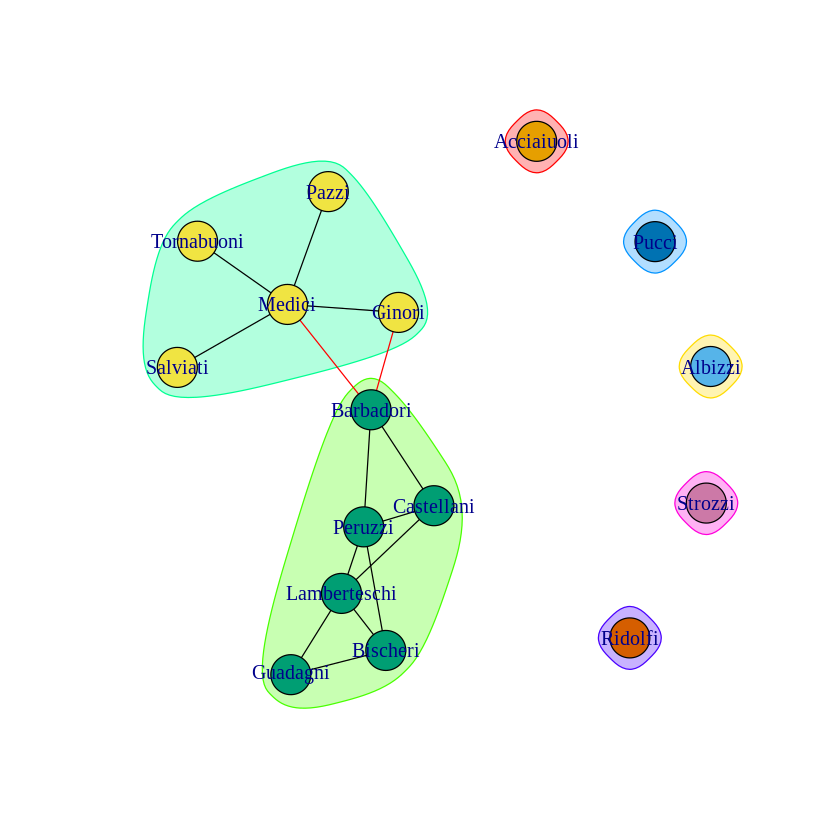

[1] 0.3644444

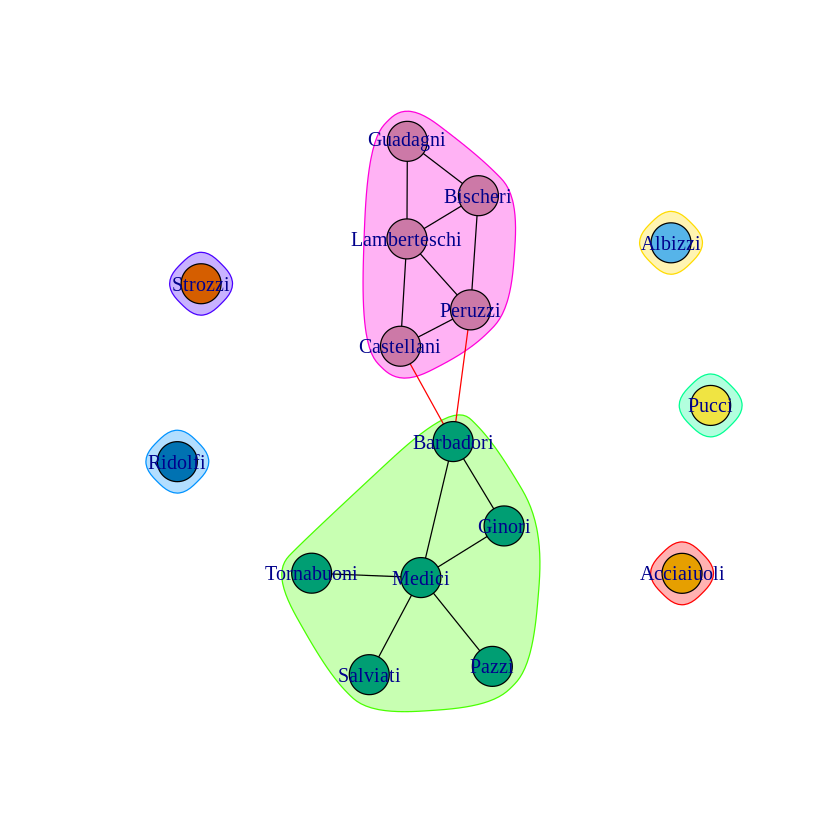

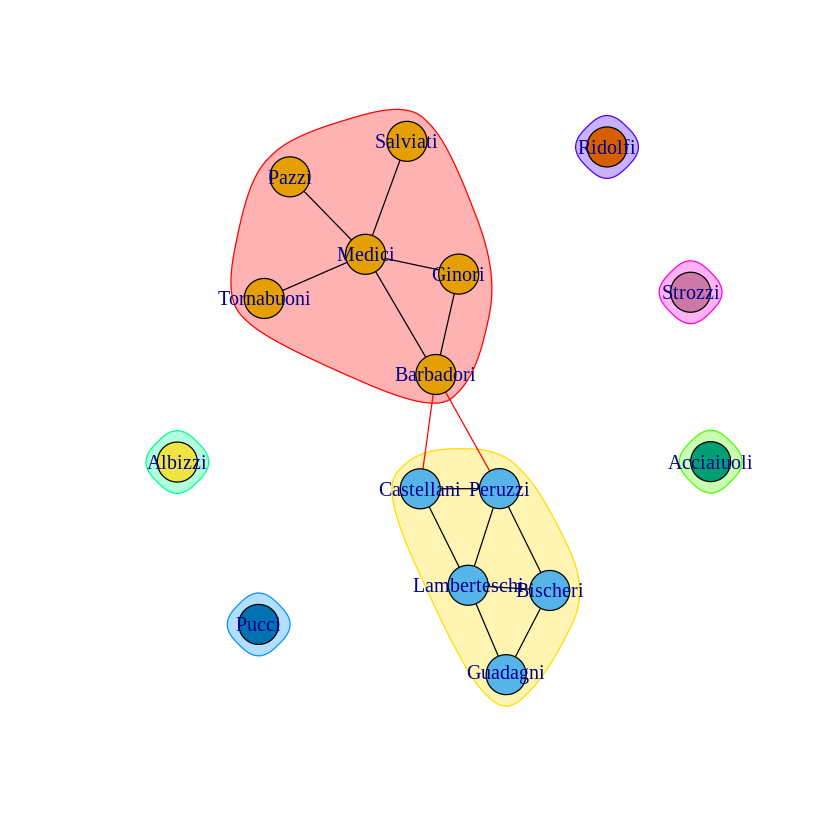

In [13]:
#Edge-betweenness
eb <- cluster_edge_betweenness(graph)
modularity(eb)
plot(eb, graph)

#Leading eigenvector
le <- cluster_leading_eigen(graph)
modularity(le)
plot(le, graph)

#Fast-greedy.
fg <- cluster_fast_greedy(graph)
modularity(fg)
plot(fg, graph)   



4. Извлечение матрицы инцидентности из файла ceo.csv.

In [14]:
ceo_table <- read.csv("/content/ceo.csv", header = F, skip = 9)
colnames(ceo_table) <- letters[1:15]
rownames(ceo_table) <- c(1:26)
ceo_matrix <- data.matrix(ceo_table)
ceo_graph <- graph_from_incidence_matrix(ceo_matrix)
ceo_matrix
     


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


5. Отображение сети в виде биграфа

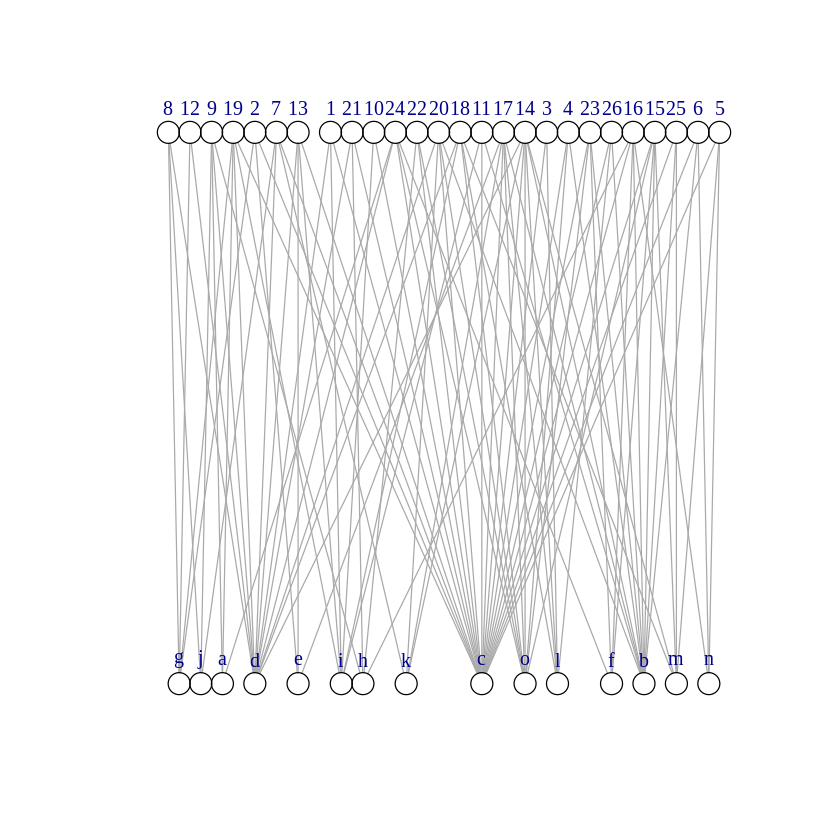

In [16]:
plot(ceo_graph, layout = layout_as_bipartite,
     vertex.size = 8,
     vertex.label.degree = -pi/2, 
     vertex.label.dist = 1.2,
     vertex.label.cex = 1,
     vertex.color=c("red","blue")[V(graph)$type+1])

6. Отображение сети в виде гиперграфа с помощью HyperG

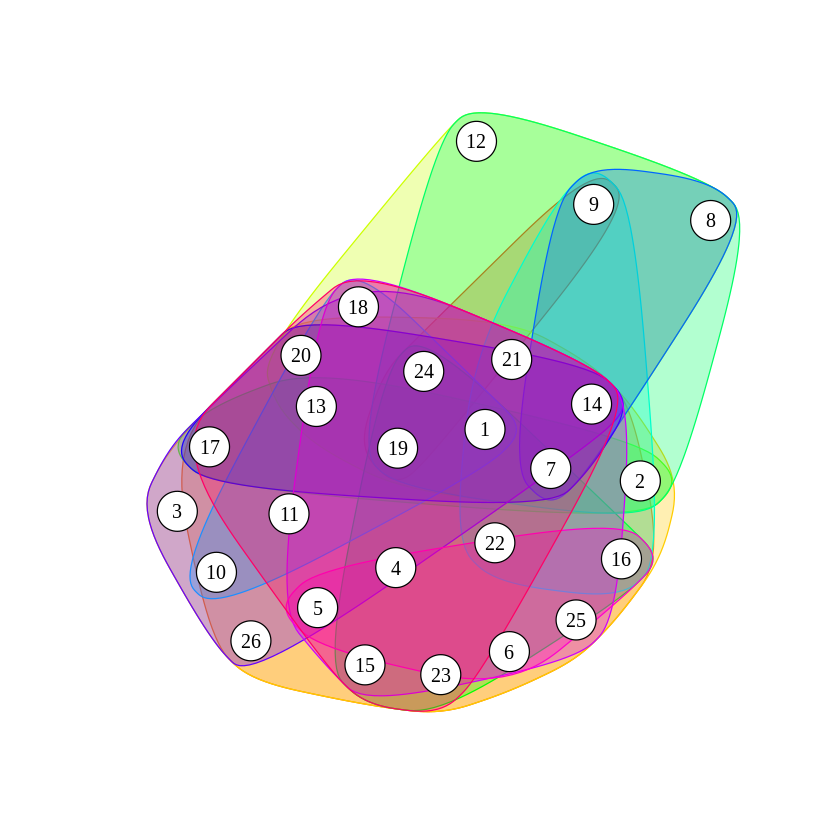

In [22]:
ceo_transpose <- t(ceo_matrix) 
h <- hypergraph_from_incidence_matrix(ceo_transpose)
plot(h,
     vertex.color = "white",
     vertex.label.color = "black")
     


7. Представление сети аффилированости в виде двух сетей.

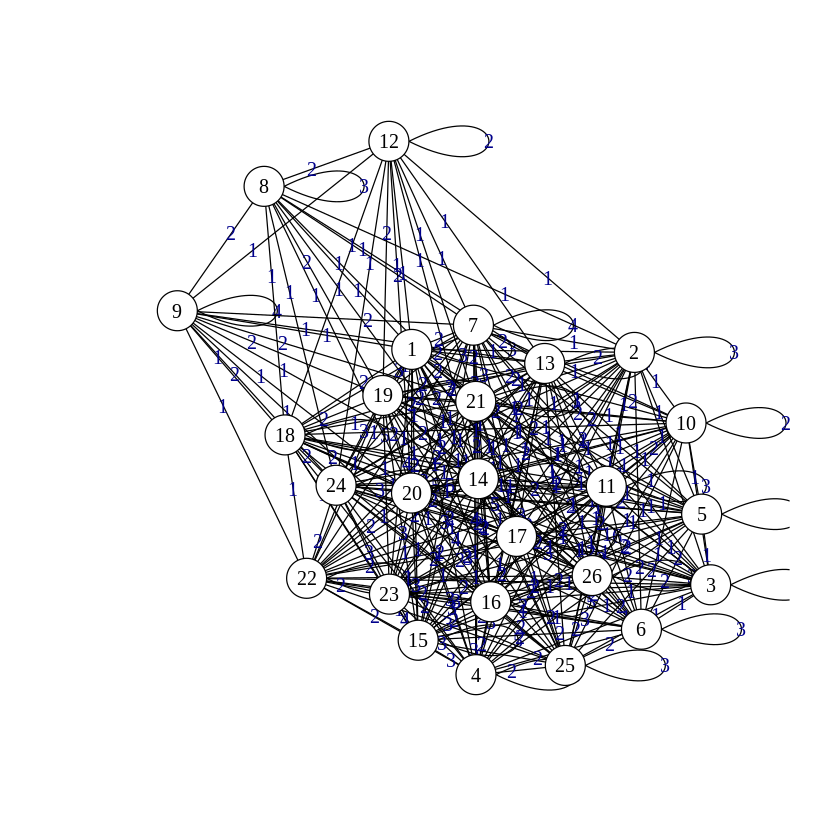

In [24]:
#Построение матрицы соучастия акторов и отображение одномодальной сети по ней
comembership_matrix <- tcrossprod(ceo_matrix)
comembership_graph <- graph.adjacency(comembership_matrix, mode = 'undirected', weighted = T)

plot(comembership_graph, layout = layout_with_fr,
     vertex.label = V(comembership_graph)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "black",
     edge.label = E(comembership_graph)$weight,
     vertex.color = "white",
     vertex.label.color = "black", 
     edge.color = "black")

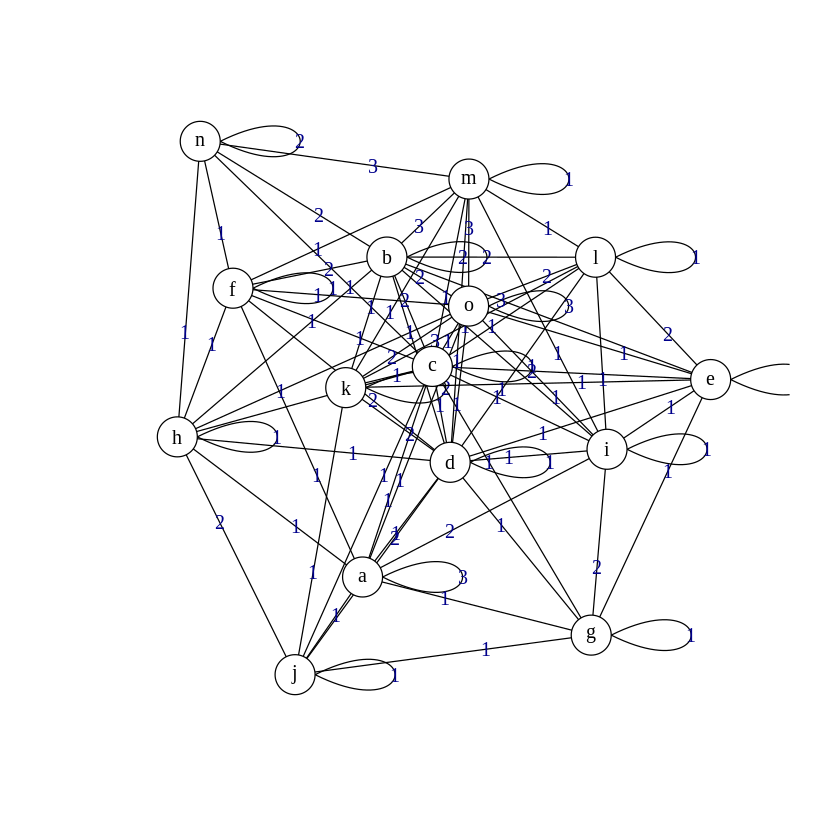

In [25]:
#построение матрицы перекрытия событий и отображение по ней модальной сети

overlap_matrix <- t(ceo_matrix) %*% ceo_matrix
overlap_graph <- graph.adjacency(overlap_matrix, mode = 'undirected', weighted = T)

plot(overlap_graph, layout = layout_with_fr,
     vertex.label = V(overlap_graph)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "black",
     edge.label = E(comembership_graph)$weight,
     vertex.color= "white",
     vertex.label.color = "black", 
     edge.color = "black")
     


Вывод: каждый из акторов в общем случае участвует в одом событии хотя бы с одним другим акторов, наибольшее количество участников имеет событие c.

8. Вычисление степени участия для каждого актора, среднее количество событий, с которыми актор аффилирован.

In [26]:
n_cols <- ncol(ceo_matrix)
n_rows <- nrow(ceo_matrix)
part_degree <- rowSums(ceo_matrix)
avg_part_degree <- sum(part_degree)/n_rows
part_df <- data.frame(part_degree)
part_df
avg_part_degree
     


,part_degree
,<dbl>
1,3
2,3
3,2
4,3
5,3
6,3
7,4
8,3
9,4


[1] 3.769231

Вывод: каждый актор связан в среднем с 3.77 событиями. Это достаточно немного по сравнению с общим количеством событий.

9. Вычисление размера и среднего размера для каждого события.

In [27]:
event_degree <- colSums(ceo_matrix)
avg_event_degree <- sum(event_degree)/n_cols
event_df <- data.frame(event_degree)
event_df
avg_event_degree

,event_degree
,<dbl>
a,3
b,11
c,22
d,12
e,3
f,4
g,4
h,4
i,6


[1] 6.533333

Вывод: в каждом событии участвует в среднем 6.53 акторов, что в 4 раза меньше, чем общее количество акторов.

10. Вычисление плотности для отношения участия и перекрытия.

In [28]:
comembership_density  <- (sum(comembership_matrix) - sum(diag(comembership_matrix)))/(n_rows*(n_rows - 1))
overlap_density <- (sum(overlap_matrix) - sum(diag(overlap_matrix)))/(n_cols*(n_cols - 1))
cat("Плотность для отношения соучастия:", comembership_density, "\n")
cat("Плотность для отношения перекрытия:", overlap_density)

Плотность для отношения соучастия: 1.412308 
Плотность для отношения перекрытия: 1.485714

Вывод: разница между плотностями незначительная. Даные значения малы по сравнению с общим числом акторов и событий.

11. Вычисление диаметра сети аффилированности

In [29]:
diameter(ceo_graph)

[1] 5

12. Определение клики уровня 𝑐 = {4, 3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.

In [30]:
print(1)
temp <- delete_edges(comembership_graph,  E(comembership_graph)[E(comembership_graph)$weight < 3])
max_cliques(temp, min = 3)
print(2)
temp <- delete_edges(comembership_graph,  E(comembership_graph)[E(comembership_graph)$weight < 3])
max_cliques(temp, min = 3)
     


[1] 1


[[1]]
+ 3/26 vertices, named, from 1b266d0:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 1b266d0:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 1b266d0:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 1b266d0:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 1b266d0:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 1b266d0:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 1b266d0:
[1] 14 4  23 20 17 15


[1] 2


[[1]]
+ 3/26 vertices, named, from bcaa0f6:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from bcaa0f6:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from bcaa0f6:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from bcaa0f6:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from bcaa0f6:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from bcaa0f6:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from bcaa0f6:
[1] 14 4  23 20 17 15


In [31]:
print(1)
temp <- delete_edges(overlap_graph,  E(overlap_graph)[E(overlap_graph)$weight < 3])
max_cliques(temp, min = 3)
print(2)
temp <- delete_edges(overlap_graph,  E(overlap_graph)[E(overlap_graph)$weight < 4])
max_cliques(temp, min = 3)
print(3)
temp <- delete_edges(overlap_graph,  E(overlap_graph)[E(overlap_graph)$weight < 5])
max_cliques(temp, min = 3)
print(4)
temp <- delete_edges(overlap_graph,  E(overlap_graph)[E(overlap_graph)$weight < 6])
max_cliques(temp, min = 3)

[1] 1


[[1]]
+ 3/15 vertices, named, from e96e3f1:
[1] i c d

[[2]]
+ 4/15 vertices, named, from e96e3f1:
[1] m b o c

[[3]]
+ 4/15 vertices, named, from e96e3f1:
[1] o c b f

[[4]]
+ 4/15 vertices, named, from e96e3f1:
[1] o c b k

[[5]]
+ 4/15 vertices, named, from e96e3f1:
[1] o c b l

[[6]]
+ 4/15 vertices, named, from e96e3f1:
[1] o c d k


[1] 2


[[1]]
+ 3/15 vertices, named, from b158f33:
[1] o c b

[[2]]
+ 3/15 vertices, named, from b158f33:
[1] o c d

[[3]]
+ 3/15 vertices, named, from b158f33:
[1] d c i


[1] 3


[[1]]
+ 3/15 vertices, named, from fb5c148:
[1] b c o


[1] 4


[[1]]
+ 3/15 vertices, named, from c18ecc2:
[1] b c o


13. Определение отношения шансов.

In [32]:
kl <- t(ceo_matrix) %*% ceo_matrix
nkl <- (1 - t(ceo_matrix)) %*% (1 - ceo_matrix)
nk_l <- (1 - t(ceo_matrix)) %*% ceo_matrix
k_nl <- t(ceo_matrix) %*% (1 - ceo_matrix)
  
res <- c()
for(i in 2:nrow(kl)){
   for(j in 1:(i - 1)){
       theta = (kl[i,j] * nkl[i,j])/(nk_l[i,j] * k_nl[i,j])
     cat("(", i,", ",j,") = ", theta, "\n")
   }
}

( 2 ,  1 ) =  0 
( 3 ,  1 ) =  0.3 
( 3 ,  2 ) =  Inf 
( 4 ,  1 ) =  Inf 
( 4 ,  2 ) =  0.1111111 
( 4 ,  3 ) =  0 
( 5 ,  1 ) =  0 
( 5 ,  2 ) =  0.65 
( 5 ,  3 ) =  Inf 
( 5 ,  4 ) =  0.5454545 
( 6 ,  1 ) =  3.333333 
( 6 ,  2 ) =  5.25 
( 6 ,  3 ) =  Inf 
( 6 ,  4 ) =  0.3333333 
( 6 ,  5 ) =  0 
( 7 ,  1 ) =  3.333333 
( 7 ,  2 ) =  0 
( 7 ,  3 ) =  0.1 
( 7 ,  4 ) =  4.333333 
( 7 ,  5 ) =  3.333333 
( 7 ,  6 ) =  0 
( 8 ,  1 ) =  3.333333 
( 8 ,  2 ) =  0.4 
( 8 ,  3 ) =  0.4736842 
( 8 ,  4 ) =  1.2 
( 8 ,  5 ) =  0 
( 8 ,  6 ) =  2.111111 
( 8 ,  7 ) =  0 
( 9 ,  1 ) =  1.8 
( 9 ,  2 ) =  0.2 
( 9 ,  3 ) =  0.8823529 
( 9 ,  4 ) =  3 
( 9 ,  5 ) =  1.8 
( 9 ,  6 ) =  0 
( 9 ,  7 ) =  1.133333 
( 9 ,  8 ) =  0 
( 10 ,  1 ) =  5.25 
( 10 ,  2 ) =  0 
( 10 ,  3 ) =  0.04761905 
( 10 ,  4 ) =  Inf 
( 10 ,  5 ) =  0 
( 10 ,  6 ) =  0 
( 10 ,  7 ) =  3.333333 
( 10 ,  8 ) =  3.333333 
( 10 ,  9 ) =  0 
( 11 ,  1 ) =  0 
( 11 ,  2 ) =  5.25 
( 11 ,  3 ) =  Inf 
( 11 ,  4 ) =  4.33333

Вывод: много нулевых значений и значений, равных бесконечности. Нули означают, что существуют события без общих участников. Бесконечные значения говорят о том, что актор, который является участником одного из событий группы, обязательно является участником второго события в данной паре.

## Выводы

В ходе работы были реализованы функции для разбиения графы на подграфы. Были изучены сети аффилированности и их свойства.